# Context:
This Projest is about a bank (Thera Bank) whose management wants to explore ways of converting its liability customers to personal loan customers (while retaining them as depositors). A campaign that the bank ran last year for liability customers showed a healthy conversion rate of over 9% success. This has encouraged the retail marketing department to devise campaigns with better target marketing to increase the success ratio with minimal budget.

# Objective:

This Project involve use of classification algorithms to predict the likelihood of a liability customer buying personal loans based on attributes like Income, Credit Card Expenditure, Age, Education, Experience, Mortage etc. 

The classification algorithms to be used are Naive Bayes, Logistic Regression and KNN.

Other models (DT and SVM) have been also used to compare the performence. 


# Steps and tasks:
1) Read the column description and ensure you understand each attribute well

2) Study the data distribution in each attribute, share your findings

3) Get the target column distribution. Your comments

4) Split the data into training and test set in the ratio of 70:30 respectively

5) Use different classification models (Logistic, K-NN and Naïve Bayes) to predict the likelihood of a liability customer buying personal loans

6) Print the confusion matrix for all the above models

7) Give your reasoning on which is the best model in this case and why it performs better?

In [1]:
# import necessary libraries
import pandas as pd
import numpy as np
import seaborn as sns
sns.set(color_codes=True)
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score
from sklearn import metrics
from scipy.stats import zscore

In [2]:
df = pd.read_csv('Bank_Personal_Loan_Modelling.csv')
df.head()

,ID,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
0,1,25,1,49,91107,4,1.6,1,0,0,1,0,0,0
1,2,45,19,34,90089,3,1.5,1,0,0,1,0,0,0
2,3,39,15,11,94720,1,1.0,1,0,0,0,0,0,0
3,4,35,9,100,94112,1,2.7,2,0,0,0,0,0,0
4,5,35,8,45,91330,4,1.0,2,0,0,0,0,0,1


In [361]:
df.columns

Index(['ID', 'Age', 'Experience', 'Income', 'ZIP Code', 'Family', 'CCAvg',
       'Education', 'Mortgage', 'Personal Loan', 'Securities Account',
       'CD Account', 'Online', 'CreditCard'],
      dtype='object')

In [360]:
df.shape

(5000, 14)

In [189]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 14 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   ID                  5000 non-null   int64  
 1   Age                 5000 non-null   int64  
 2   Experience          5000 non-null   int64  
 3   Income              5000 non-null   int64  
 4   ZIP Code            5000 non-null   int64  
 5   Family              5000 non-null   int64  
 6   CCAvg               5000 non-null   float64
 7   Education           5000 non-null   int64  
 8   Mortgage            5000 non-null   int64  
 9   Personal Loan       5000 non-null   int64  
 10  Securities Account  5000 non-null   int64  
 11  CD Account          5000 non-null   int64  
 12  Online              5000 non-null   int64  
 13  CreditCard          5000 non-null   int64  
dtypes: float64(1), int64(13)
memory usage: 547.0 KB


In [362]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
ID,5000.0,2500.500000,1443.520003,1.0,1250.75,2500.5,3750.25,5000.0
Age,5000.0,45.338400,11.463166,23.0,35.00,45.0,55.00,67.0
Experience,5000.0,20.104600,11.467954,-3.0,10.00,20.0,30.00,43.0
Income,5000.0,73.774200,46.033729,8.0,39.00,64.0,98.00,224.0
ZIP Code,5000.0,93152.503000,2121.852197,9307.0,91911.00,93437.0,94608.00,96651.0
Family,5000.0,2.396400,1.147663,1.0,1.00,2.0,3.00,4.0
CCAvg,5000.0,1.937938,1.747659,0.0,0.70,1.5,2.50,10.0
Education,5000.0,1.881000,0.839869,1.0,1.00,2.0,3.00,3.0
Mortgage,5000.0,56.498800,101.713802,0.0,0.00,0.0,101.00,635.0
Personal Loan,5000.0,0.096000,0.294621,0.0,0.00,0.0,0.00,1.0


In [172]:
df.isnull().sum()

ID                    0
Age                   0
Experience            0
Income                0
ZIP Code              0
Family                0
CCAvg                 0
Education             0
Mortgage              0
Personal Loan         0
Securities Account    0
CD Account            0
Online                0
CreditCard            0
dtype: int64

There are no NULL values in the given dataset.

In [478]:
#Checking the correlation
df.corr()

,ID,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
ID,1.000000,-0.008473,-0.009345,-0.017695,0.013432,-0.016797,-0.024675,0.021463,-0.013920,-0.024801,-0.016972,-0.006909,-0.002528,0.017028
Age,-0.008473,1.000000,0.976730,-0.055269,-0.029216,-0.046418,-0.052012,0.041334,-0.012539,-0.007726,-0.000436,0.008043,0.013702,0.007681
Experience,-0.009345,0.976730,1.000000,-0.049063,-0.028490,-0.045431,-0.048683,0.018135,-0.013401,-0.014095,-0.000450,0.005463,0.013455,0.008829
Income,-0.017695,-0.055269,-0.049063,1.000000,-0.016410,-0.157501,0.645984,-0.187524,0.206806,0.502462,-0.002616,0.169738,0.014206,-0.002385
ZIP Code,0.013432,-0.029216,-0.028490,-0.016410,1.000000,0.011778,-0.004061,-0.017377,0.007383,0.000107,0.004704,0.019972,0.016990,0.007691
Family,-0.016797,-0.046418,-0.045431,-0.157501,0.011778,1.000000,-0.109275,0.064929,-0.020445,0.061367,0.019994,0.014110,0.010354,0.011588
CCAvg,-0.024675,-0.052012,-0.048683,0.645984,-0.004061,-0.109275,1.000000,-0.136124,0.109905,0.366889,0.015086,0.136534,-0.003611,-0.006689
Education,0.021463,0.041334,0.018135,-0.187524,-0.017377,0.064929,-0.136124,1.000000,-0.033327,0.136722,-0.010812,0.013934,-0.015004,-0.011014
Mortgage,-0.013920,-0.012539,-0.013401,0.206806,0.007383,-0.020445,0.109905,-0.033327,1.000000,0.142095,-0.005411,0.089311,-0.005995,-0.007231
Personal Loan,-0.024801,-0.007726,-0.014095,0.502462,0.000107,0.061367,0.366889,0.136722,0.142095,1.000000,0.021954,0.316355,0.006278,0.002802


In [479]:
#Covariance among the attributes
df.cov()

,ID,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
ID,2.083750e+06,-140.198640,-151.803765,-1175.826465,4.113995e+04,-27.827566,-62.250047,26.021304,-2043.804561,-10.547710,-7.492298,-2.376275,-1.790558,11.199840
Age,-1.401986e+02,131.404166,125.993164,-29.164822,-7.106319e+02,-0.610664,-1.041997,0.397949,-14.619518,-0.026092,-0.001529,0.021965,0.077058,0.040118
Experience,-1.518038e+02,125.993164,126.629726,-25.415300,-6.802498e+02,-0.586725,-0.957414,0.171393,-15.339080,-0.046729,-0.001548,0.014646,0.074277,0.045268
Income,-1.175826e+03,-29.164822,-25.415300,2119.104235,-1.602857e+03,-8.320957,51.970200,-7.250120,968.321693,6.814640,-0.036834,1.861611,0.320822,-0.050025
ZIP Code,4.113995e+04,-710.631942,-680.249832,-1602.857394,4.502257e+06,28.681947,-15.058132,-30.966736,1593.492802,0.067125,3.052497,10.096438,17.685947,7.436005
Family,-2.782757e+01,-0.610664,-0.586725,-8.320957,2.868195e+01,1.317130,-0.219174,0.062584,-2.386602,0.020750,0.007017,0.003858,0.005830,0.006060
CCAvg,-6.225005e+01,-1.041997,-0.957414,51.970200,-1.505813e+01,-0.219174,3.054312,-0.199803,19.536778,0.188910,0.008063,0.056850,-0.003096,-0.005327
Education,2.602130e+01,0.397949,0.171393,-7.250120,-3.096674e+01,0.062584,-0.199803,0.705380,-2.847012,0.033831,-0.002777,0.002788,-0.006182,-0.004215
Mortgage,-2.043805e+03,-14.619518,-15.339080,968.321693,1.593493e+03,-2.386602,19.536778,-2.847012,10345.697538,4.258167,-0.168308,2.164305,-0.299144,-0.335114
Personal Loan,-1.054771e+01,-0.026092,-0.046729,6.814640,6.712543e-02,0.020750,0.188910,0.033831,4.258167,0.086801,0.001978,0.022206,0.000907,0.000376


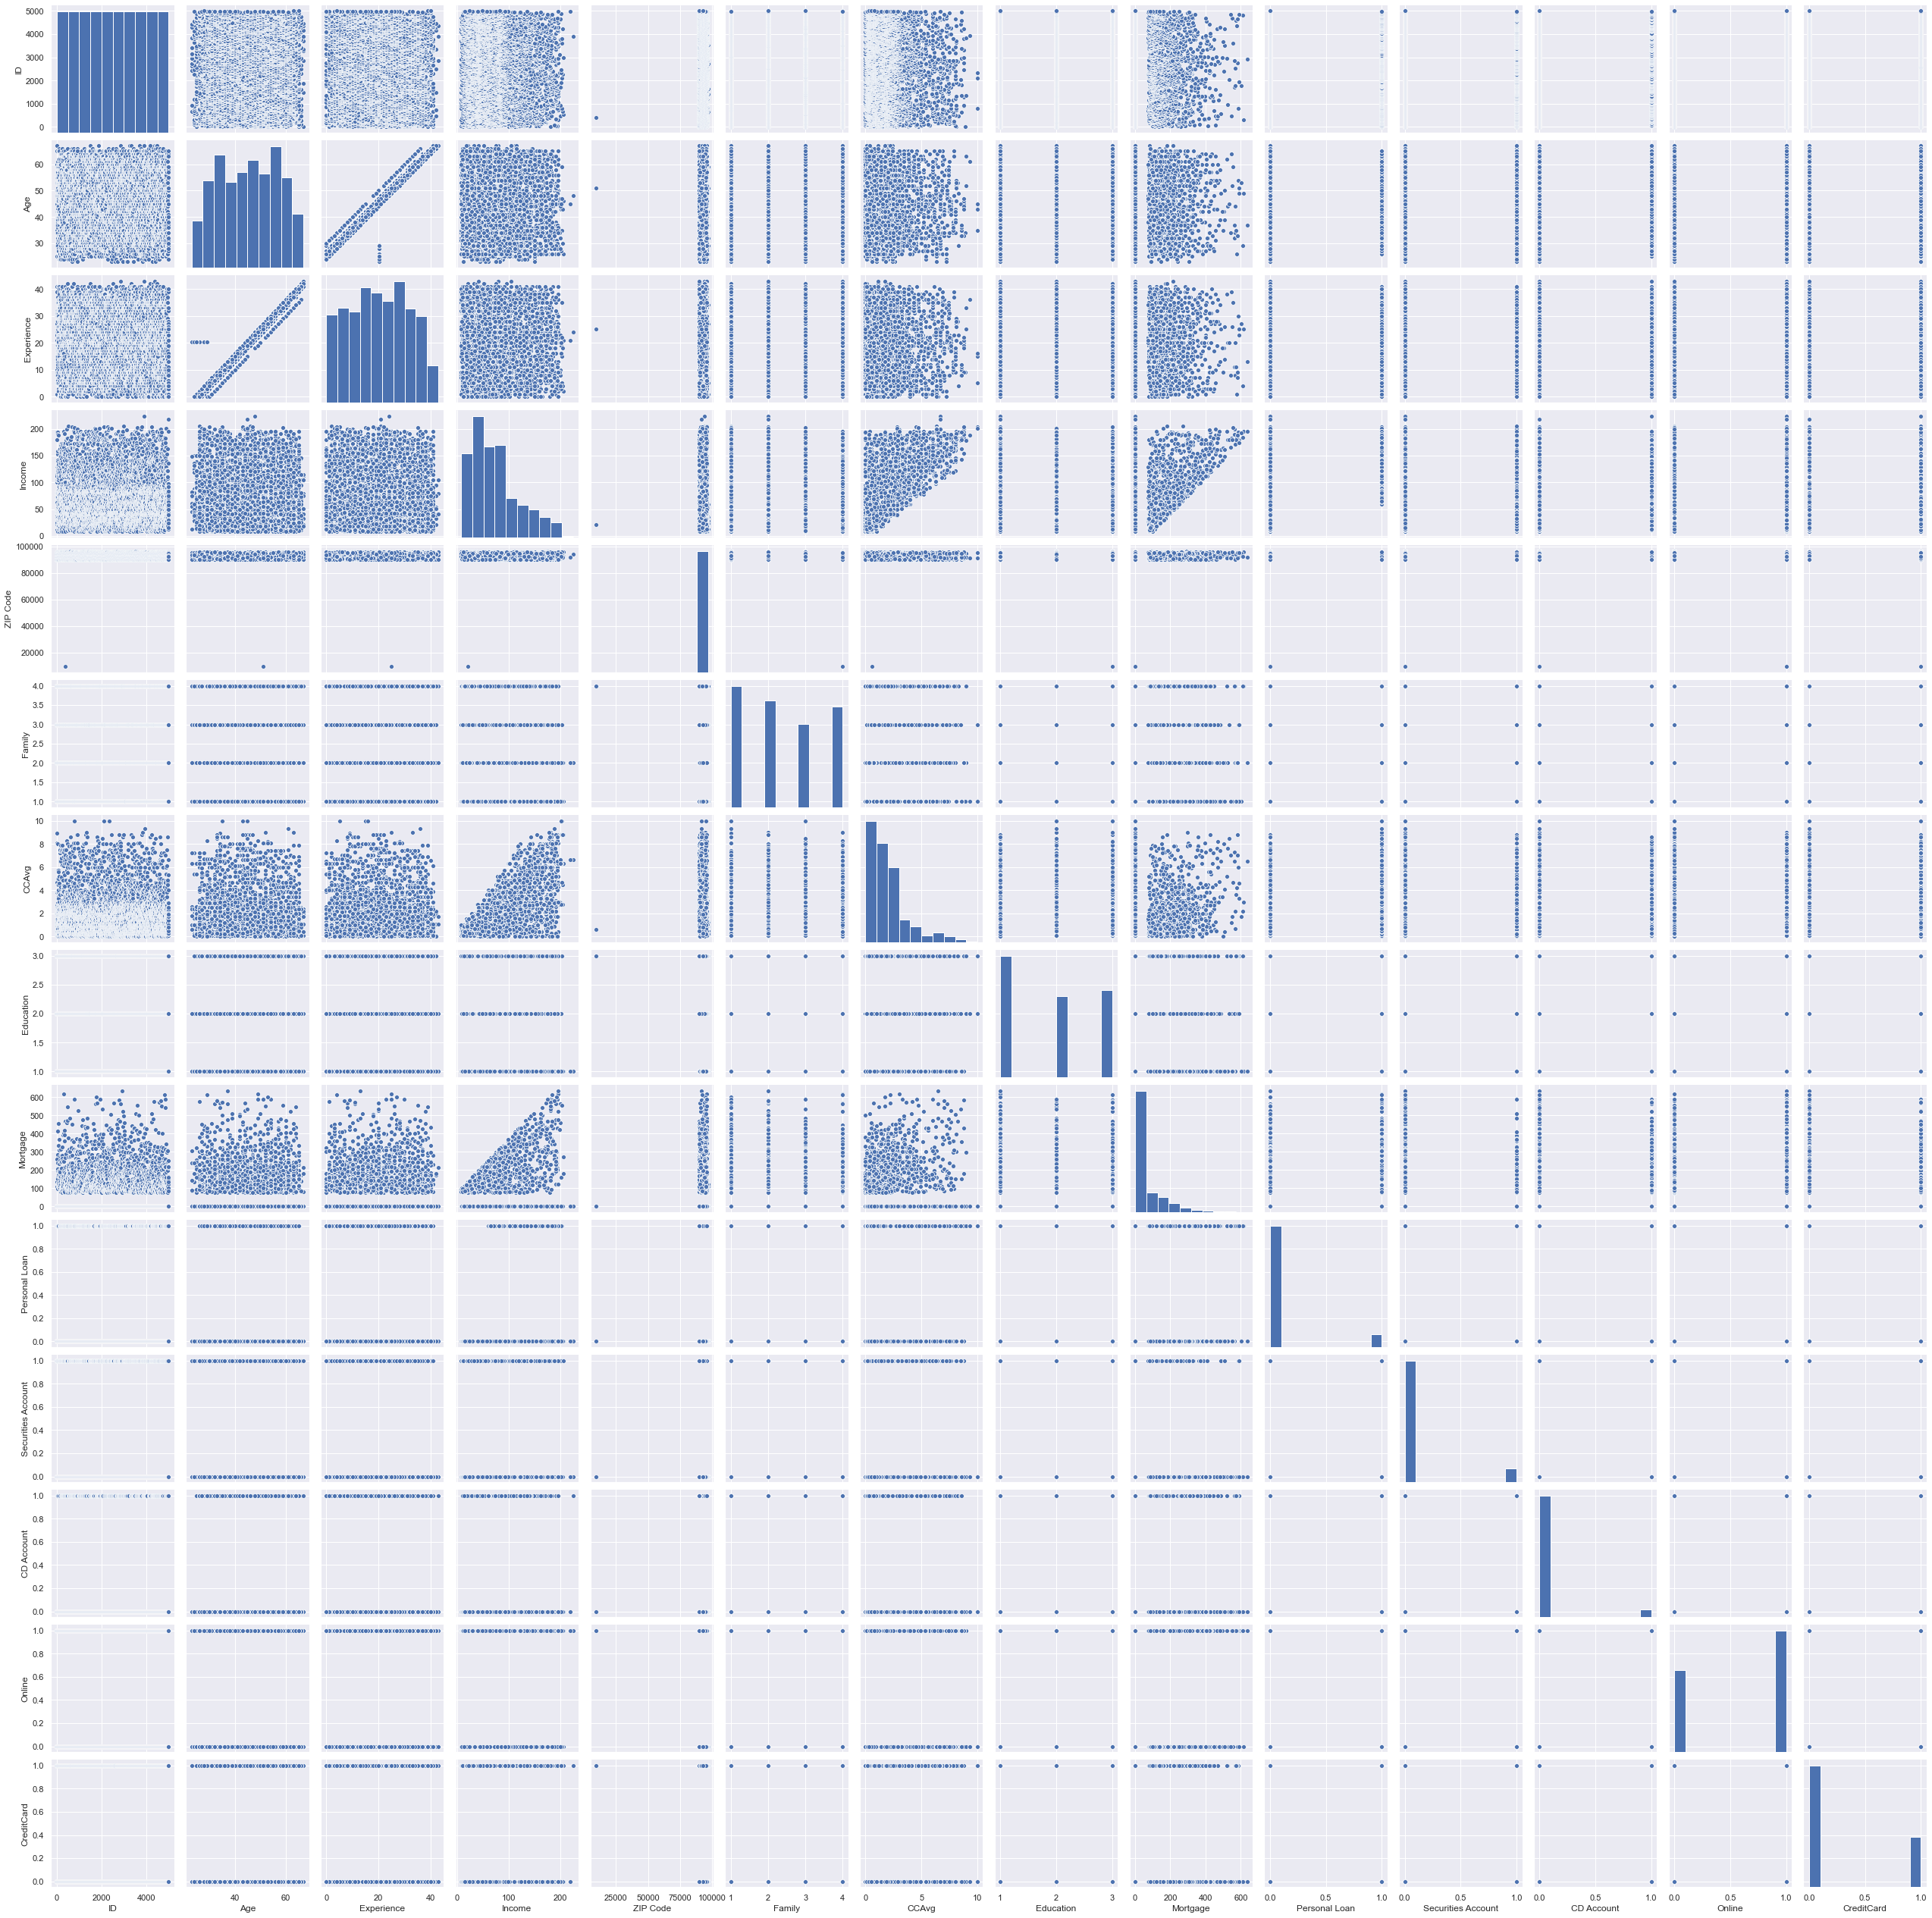

In [214]:
sns.pairplot(df);

# 1. Understanding the Column description for each attribute

There are 14 columns and 5000 rows showing the Bank's customer details

Information on the features or attributes

The nominal variables:
1. ID:  The variable 'ID' does not add any value. There is no association between a person's customer ID and loan, also it does not provide any general conclusion for future potential loan customers. We can neglect this information for our model prediction.

2. Zip Code: Home addess ZIP Code


Categorical Data: There are Five Variables mentioned below

3. Personal Loan - Did this customer accept the personal loan offered in the last campaign? #This is our target variable
4. Securities Account - Does the customer have a securities account with the bank?
5. CD Account - Does the customer have a certificate of deposit (CD) account with the bank?
6. Online - Does the customer use internet banking facilities?
7. Credit Card - Does the customer use a credit card issued by the Thera Bank?

Interval variables are as below:

8. Age - Age of the customer
9. Experience - Years of experience (It has been observed that there are few customers with less then zero years of experience. We can assume these are incorrect data. This column must have +ve data.
10. Income - Annual income in thousand dollars ($000)

11. CCAvg - Average credit card spending per month in $000

12. Mortage - Value of House Mortgage if any ($000) 

Ordinal Categorical Variables are:

13. Family - Family size of the customer (1,2,3 and 4)
14. Education - Education level of the customer 
    1 - Undergrad
    2 - Graduate
    3 - Advanced/Professional


# 2) Study the data distribution in each attribute, share your findings


Since the objective is to predict the likelyhood of a customer buying Pesonal Loan, It makes perfect sense to analyze 
- 1. The distribution of the inependent variables
- 2. Bivariate analysis of the various independent attributes such as Age, Income, Experience, CCAvg etc. along with the Target Variable Pesonal Loan ! 

In [191]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
ID,5000.0,2500.500000,1443.520003,1.0,1250.75,2500.5,3750.25,5000.0
Age,5000.0,45.338400,11.463166,23.0,35.00,45.0,55.00,67.0
Experience,5000.0,20.104600,11.467954,-3.0,10.00,20.0,30.00,43.0
Income,5000.0,73.774200,46.033729,8.0,39.00,64.0,98.00,224.0
ZIP Code,5000.0,93152.503000,2121.852197,9307.0,91911.00,93437.0,94608.00,96651.0
Family,5000.0,2.396400,1.147663,1.0,1.00,2.0,3.00,4.0
CCAvg,5000.0,1.937938,1.747659,0.0,0.70,1.5,2.50,10.0
Education,5000.0,1.881000,0.839869,1.0,1.00,2.0,3.00,3.0
Mortgage,5000.0,56.498800,101.713802,0.0,0.00,0.0,101.00,635.0
Personal Loan,5000.0,0.096000,0.294621,0.0,0.00,0.0,0.00,1.0


# Distribution Analysis of Interval/ Continuos variables ! 

## <font color=blue>Data Correctness for the 'Experience' attribute of the given dataset
  </font>

In [363]:
print(df['Experience'].describe())
# Experience column must have +ve entries
print('\n # of -ve entries in the Exeperience column:', df[df['Experience'] < 0]['Experience'].count())

count    5000.000000
mean       20.104600
std        11.467954
min        -3.000000
25%        10.000000
50%        20.000000
75%        30.000000
max        43.000000
Name: Experience, dtype: float64

 # of -ve entries in the Exeperience column: 52


In [364]:
#Checking the -ve values and its count
df[df['Experience'] < 0]['Experience'].value_counts()


-1    33
-2    15
-3     4
Name: Experience, dtype: int64

> Negative Values are -1, -2, and -3 which are incorrect and hence we can replace 

In [4]:
#Replacing -ve values with SimpleImputer
# Replacing -1
from sklearn.impute import SimpleImputer
#r_nv = 
rep = SimpleImputer(missing_values= -1, strategy="mean")
rep = rep.fit(df[['Experience']])
df['Experience'] = rep.transform(df[['Experience']])

#Replacing -2 
rep_2 = SimpleImputer(missing_values= -2, strategy="mean")
rep_2= rep_2.fit(df[['Experience']])
df['Experience'] = rep_2.transform(df[['Experience']])

#Replacing -2 
rep_3 = SimpleImputer(missing_values= -3, strategy="mean")
rep_3= rep_3.fit(df[['Experience']])
df['Experience'] = rep_3.transform(df[['Experience']])


In [5]:
# Validating the existance of -ve values
df[df['Experience'] < 0]['Experience'].value_counts()

Series([], Name: Experience, dtype: int64)

## <font color=blue>Distribution Analysis of the continuous attributes Age, Experience, Income, CCAvg, Mortgage
  </font>


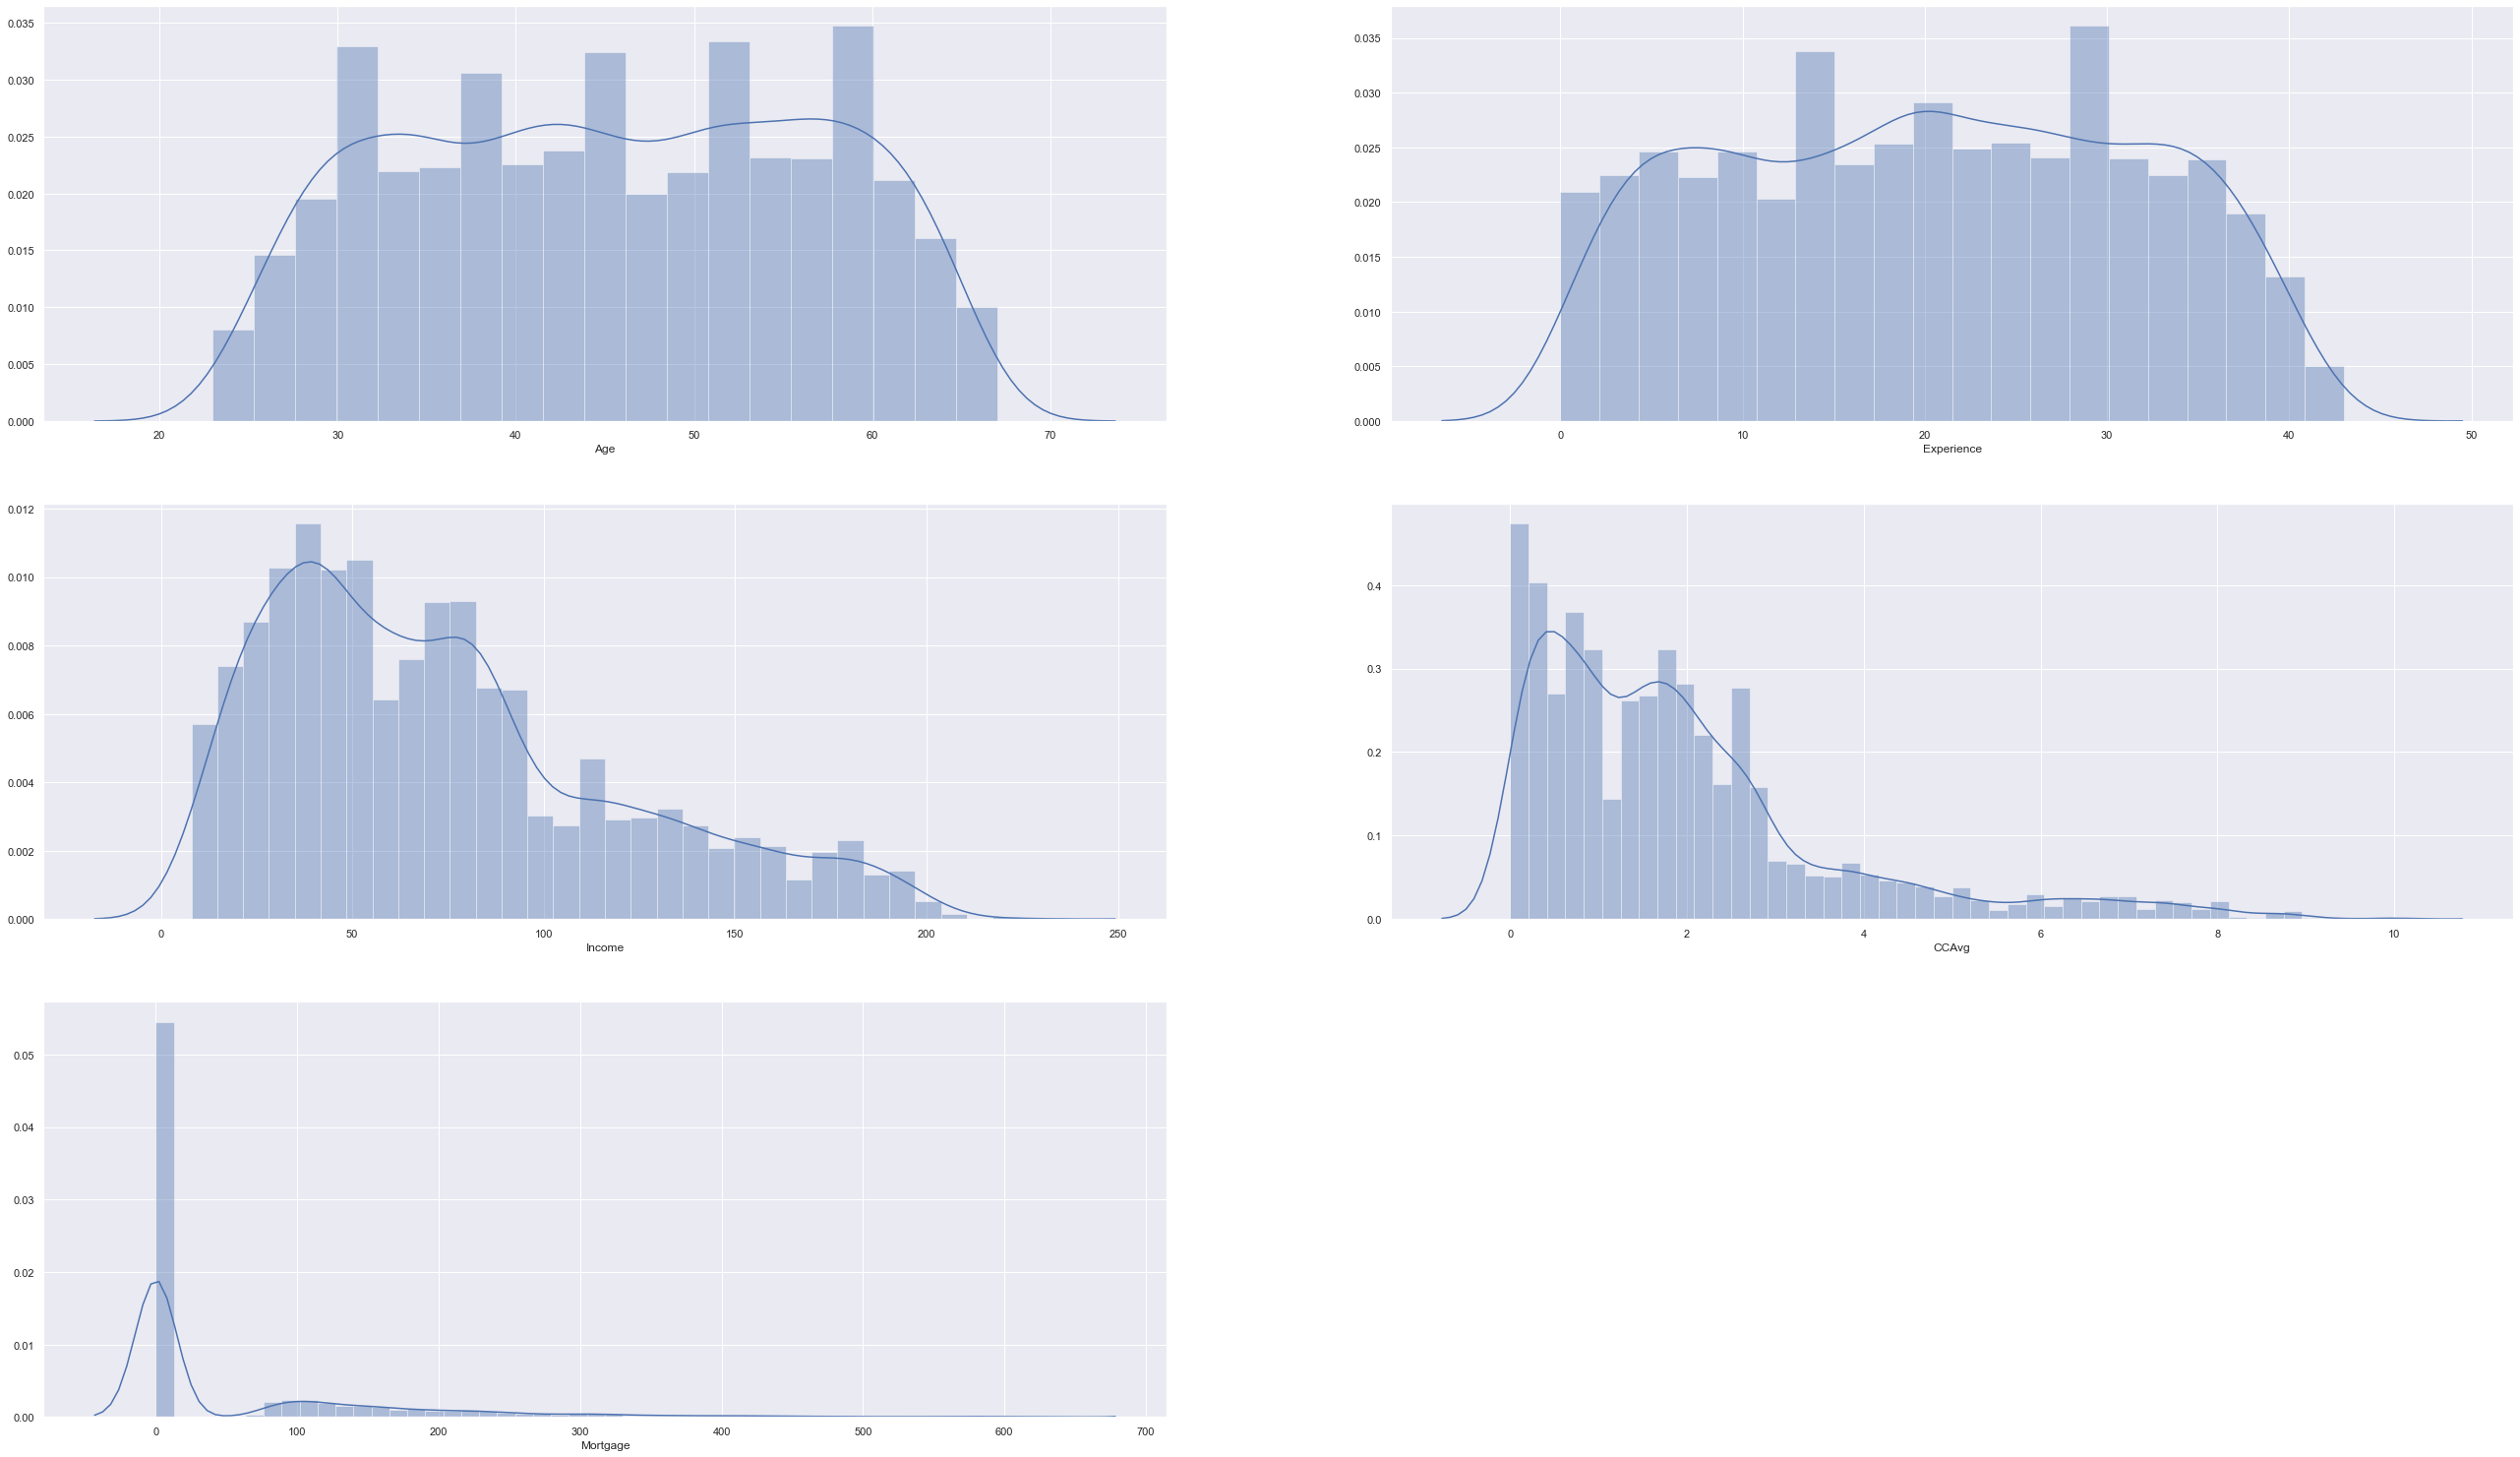

In [367]:
plt.figure(figsize=(45,45))
plt.subplot(5,2,1)
sns.distplot(df['Age']);

plt.subplot(5,2,2)
sns.distplot(df['Experience']);

plt.subplot(5,2,3)
sns.distplot(df['Income']);

plt.subplot(5,2,4)
sns.distplot(df['CCAvg']);

plt.subplot(5,2,5)
sns.distplot(df['Mortgage']);

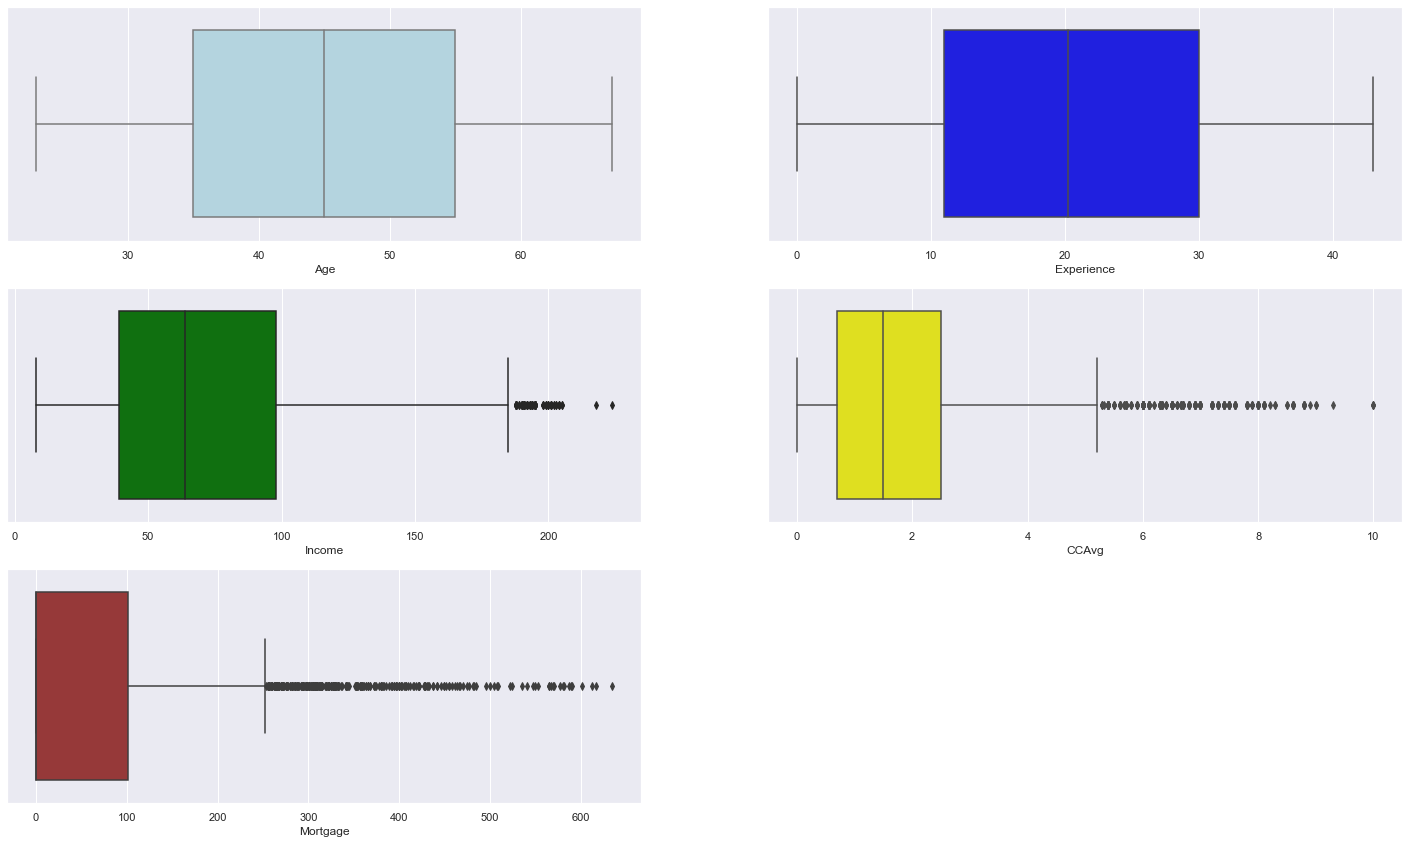

In [178]:
plt.figure(figsize=(25,25))
plt.subplot(5,2,1)
sns.boxplot(df['Age'],color='lightblue');

plt.subplot(5,2,2)
sns.boxplot(df['Experience'],color='blue');

plt.subplot(5,2,3)
sns.boxplot(df['Income'],color='green');

plt.subplot(5,2,4)
sns.boxplot(df['CCAvg'],color='yellow');

plt.subplot(5,2,5)
sns.boxplot(df['Mortgage'],color='brown');

- Checking Outliers 

In [180]:
for column in df[['Age','Experience','Income','CCAvg','Mortgage']]:
    val = column
    q1 = df[val].quantile(0.25)
    q3 = df[val].quantile(0.75)
    iqr = q3-q1
    lower_fence  = q1-(1.5*iqr)
    higher_fence = q3+(1.5*iqr)
    df_out = df.loc[(df[val] < lower_fence) | (df[val] > higher_fence)]
    if df_out.empty:
           print('No Outliers for the ' + val + ' attribute of given dataset')
    else:
            print('There are Outliers for the ' + val + ' attribute of given dataset')

No Outliers for the Age attribute of given dataset
No Outliers for the Experience attribute of given dataset
There are Outliers for the Income attribute of given dataset
There are Outliers for the CCAvg attribute of given dataset
There are Outliers for the Mortgage attribute of given dataset


> Checking the Skeweness 

In [181]:
#print(df[['Age','Experience','Income','CCAvg','Mortgage']].skew())

import scipy.stats as stats
print("Skewness for 'Age' is {0:2.2}".format(stats.skew(df.Age)))
print("Skewness for 'Experience' is {0:2.2}".format(stats.skew(df.Experience)))
print("Skewness for 'Income' is {0:2.2}".format(stats.skew(df.Income)))
print("Skewness for 'CCAvg' is {0:2.2}".format(stats.skew(df.CCAvg)))
print("Skewness for 'Mortgage' is {0:2.2}".format(stats.skew(df.Mortgage)))


Skewness for 'Age' is -0.029
Skewness for 'Experience' is -0.015
Skewness for 'Income' is 0.84
Skewness for 'CCAvg' is 1.6
Skewness for 'Mortgage' is 2.1


Text(0.5, 0, 'Mortgage')

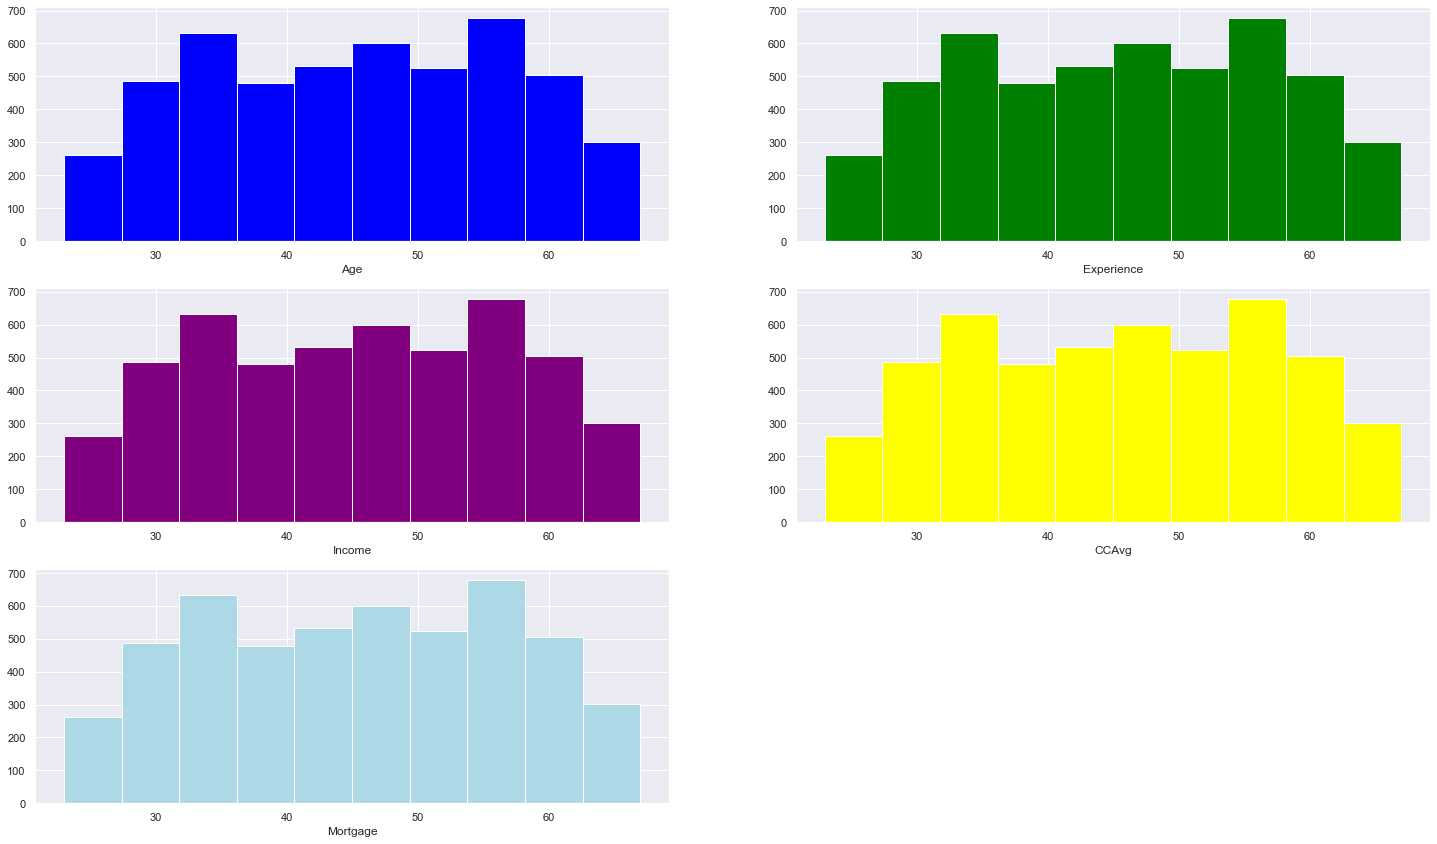

In [182]:
plt.figure(figsize=(25,25))
plt.subplot(5,2,1)
plt.hist(df.Age, color='blue');
plt.xlabel('Age')

plt.subplot(5,2,2)
plt.hist(df.Age, color='green');
plt.xlabel('Experience')

plt.subplot(5,2,3)
plt.hist(df.Age, color='purple');
plt.xlabel('Income')

plt.subplot(5,2,4)
plt.hist(df.Age, color='yellow');
plt.xlabel('CCAvg')

plt.subplot(5,2,5)
plt.hist(df.Age, color='lightblue');
plt.xlabel('Mortgage')



#plt.ylabel('# of Customers')

- From the above graph is it eveident that the distribution for Age and Experience is uniform, there are no outliers and mean and median are almost same.

> 1). Age: The mean and median of the attribute are almost equal. The distribution is normal with three peaks indicating customer with these age are higher in number. Also majority of customers falling between 30 years and 60 years of age.

> 2). Experience: (After correcting the data) Mean and median is almost equal with normal Data distribution.

> 4). Income : Data is highly left skewed (Skewness =0.84). Majority of the customers have income between 45K and 55K. We can confirm this by saying the mean is greater than the median

> 5). CCAvg: CCAvg is a positively skewed variable (skewness =1.6)  and average spending is between 0K to 10K and majority spends less than 2.5K

> 6). Mortage: This attribute is highly left skewed with a very high peak on the left. 75% of the individuals have a mortgage of less than 100K. However the max value is 635K

## <font color=blue>Univariate Analysis of the categorical variables</font>

Text(0.5, 1.0, 'Credit Card Distribution')

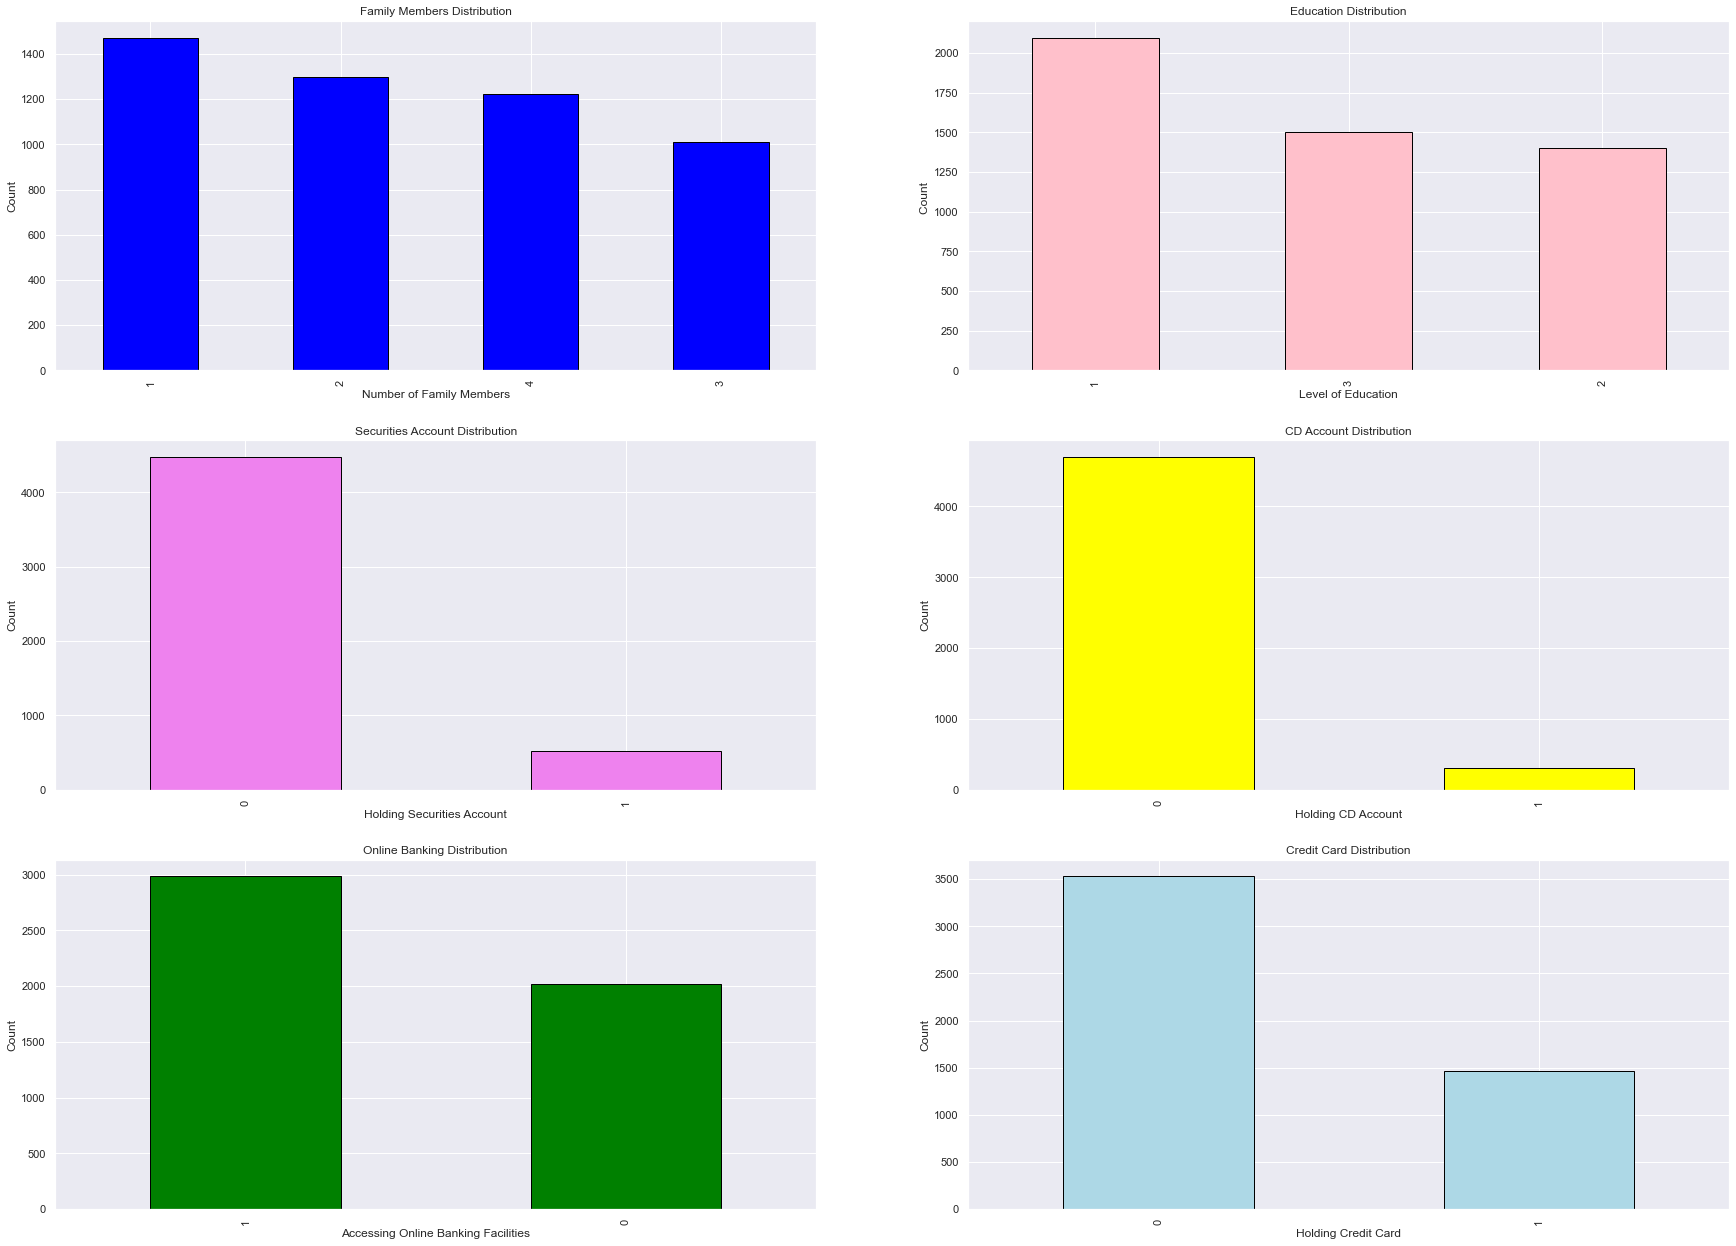

In [213]:

plt.figure(figsize=(30,45))


plt.subplot(6,2,1)
df['Family'].value_counts().plot(kind="bar", align='center',color = 'blue',edgecolor = 'black')
plt.xlabel("Number of Family Members")
plt.ylabel("Count")
plt.title("Family Members Distribution")


plt.subplot(6,2,2)
df['Education'].value_counts().plot(kind="bar", align='center',color = 'pink',edgecolor = 'black')
plt.xlabel('Level of Education')
plt.ylabel('Count ')
plt.title('Education Distribution')


plt.subplot(6,2,3)
df['Securities Account'].value_counts().plot(kind="bar", align='center',color = 'violet',edgecolor = 'black')
plt.xlabel('Holding Securities Account')
plt.ylabel('Count')
plt.title('Securities Account Distribution')


plt.subplot(6,2,4)
df['CD Account'].value_counts().plot(kind="bar", align='center',color = 'yellow',edgecolor = 'black')
plt.xlabel('Holding CD Account')
plt.ylabel('Count')
plt.title("CD Account Distribution")


plt.subplot(6,2,5)
df['Online'].value_counts().plot(kind="bar", align='center',color = 'green',edgecolor = 'black')
plt.xlabel('Accessing Online Banking Facilities')
plt.ylabel('Count')
plt.title("Online Banking Distribution")


plt.subplot(6,2,6)
df['CreditCard'].value_counts().plot(kind="bar", align='center',color = 'lightblue',edgecolor = 'black')
plt.xlabel('Holding Credit Card')
plt.ylabel('Count')
plt.title("Credit Card Distribution")


> 7). Family: It has 4 peaks(4 values) , families with least member is highest in the sample.

> 8). Education: Most of the customers are undergraduate

> 9). Securities Account : Mmajority of customers are not having Security account.

> 10). CD account: Most of the customers dont have CD accounts.

> 11). Online: Higher number of customers use online banking in the sample.

> 12). Credit Card: This attribute has less customers using CC in comparison to the CC users.

# 3) Get the target column distribution. Your comments

Given information on the Target Column - 'Personal Loan' are: 
> Among these 5000 customers,
    only 480 (= 9.6%) accepted the personal loan that was offered to them in the earlier campaign
    
    Personal Loan Value
    
    0 = Didn't took the loan in the last campaign (90.4%)
    1 = took the loan in the last campaign (9.6%)
Lets analize the distribution of Personal Loan with different attributes

In [200]:
df["Personal Loan"].value_counts().to_frame()

,Personal Loan
0,4520
1,480


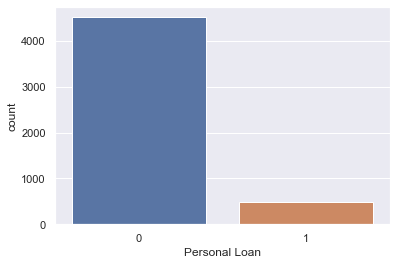

In [201]:
sns.countplot(df['Personal Loan']);

## <font color=blue> Correlation of the Target Variable (Personal Loan) with other attributes or indenpenent variables </font>

In [15]:
#Corrlation between other features and Personal Loan
df.corr()['Personal Loan']

ID                   -0.024801
Age                  -0.007726
Experience           -0.007413
Income                0.502462
ZIP Code              0.000107
Family                0.061367
CCAvg                 0.366889
Education             0.136722
Mortgage              0.142095
Personal Loan         1.000000
Securities Account    0.021954
CD Account            0.316355
Online                0.006278
CreditCard            0.002802
Name: Personal Loan, dtype: float64

In [219]:
df[['Personal Loan', 'Age', 'Income', 'CCAvg', 'Mortgage']].corr()

,Personal Loan,Age,Income,CCAvg,Mortgage
Personal Loan,1.000000,-0.007726,0.502462,0.366889,0.142095
Age,-0.007726,1.000000,-0.055269,-0.052012,-0.012539
Income,0.502462,-0.055269,1.000000,0.645984,0.206806
CCAvg,0.366889,-0.052012,0.645984,1.000000,0.109905
Mortgage,0.142095,-0.012539,0.206806,0.109905,1.000000


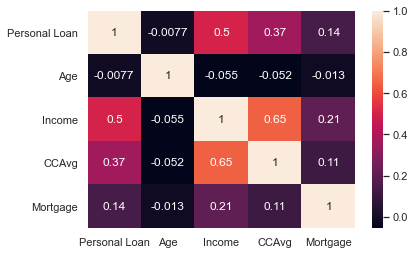

In [218]:
sns.heatmap(df[['Personal Loan', 'Age', 'Income', 'CCAvg', 'Mortgage']].corr(), annot = True)

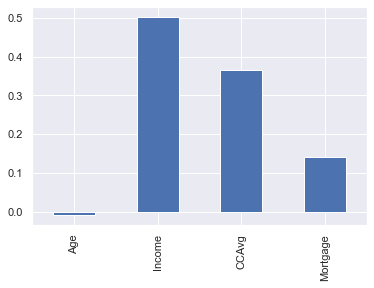

In [368]:
#Correlation of key attributes with Target Variable
df[['Personal Loan', 'Age', 'Income', 'CCAvg', 'Mortgage']].corr()['Personal Loan'][1:].plot.bar()

In [480]:
#Bucketing the Customer who took the Personal Loan basedo in income to understand the correlation of income with Personal Loan 
inc_cut = pd.cut(df['Income'],bins=[0,50,100,150,200,250])
pd.crosstab(inc_cut,df['Personal Loan']).apply(lambda r: r/r.sum()*100, axis=1)

Personal Loan,0,1
Income,,
"(0, 50]",100.000000,0.000000
"(50, 100]",97.758805,2.241195
"(100, 150]",71.428571,28.571429
"(150, 200]",49.530516,50.469484
"(200, 250]",81.250000,18.750000


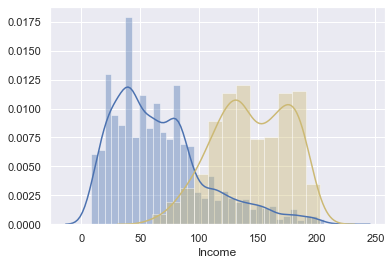

In [481]:
# Distribution of Income with Personal Loan 
sns.distplot(df[df["Personal Loan"] == 0]['Income'], color = 'b');
sns.distplot(df[df["Personal Loan"] == 1]['Income'], color = 'y');

In [204]:
#Bucketing the Customer with Mortgage amount and who took the Personal Loan 
mort_cut = pd.cut(df['Mortgage'],bins=[0,100,200,300,400,500,600])
pd.crosstab(mort_cut,df['Personal Loan']).apply(lambda r: r/r.sum()*100, axis=1)

Personal Loan,0,1
Mortgage,,
"(0, 100]",95.390071,4.609929
"(100, 200]",94.854881,5.145119
"(200, 300]",86.531987,13.468013
"(300, 400]",68.750000,31.250000
"(400, 500]",58.333333,41.666667
"(500, 600]",33.333333,66.666667


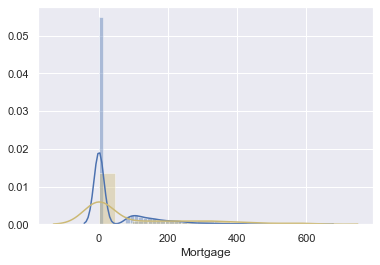

In [224]:
sns.distplot(df[df["Personal Loan"] == 0]['Mortgage'], color = 'b');
sns.distplot(df[df["Personal Loan"] == 1]['Mortgage'], color = 'y');

In [482]:
# Personal Loan along with Age Category
age_cut = pd.cut(df['Age'],bins=[20,30,40,50,60])
pd.crosstab(age_cut,df['Personal Loan']).apply(lambda r: r/r.sum()*100, axis=1)

Personal Loan,0,1
Age,,
"(20, 30]",89.423077,10.576923
"(30, 40]",90.453074,9.546926
"(40, 50]",90.393701,9.606299
"(50, 60]",91.307634,8.692366


Text(0.5, 1.0, 'Age Distribution')

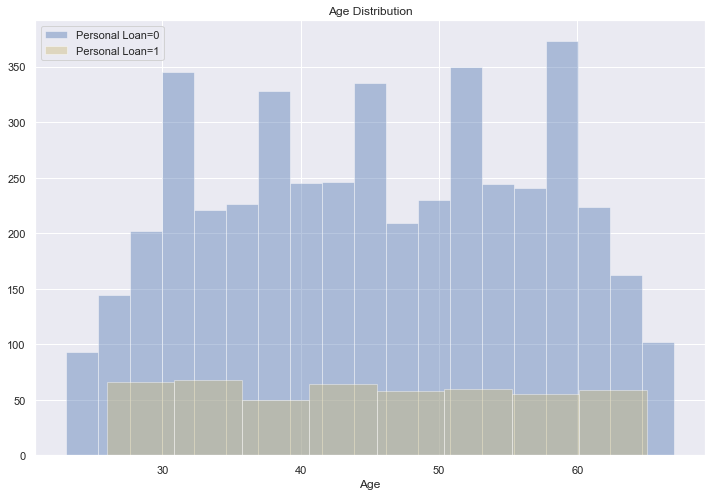

In [229]:
plt.figure(figsize=(12,8))
sns.distplot(df[df['Personal Loan'] == 0]['Age'],kde=False, color='b', label='Personal Loan=0')
sns.distplot(df[df['Personal Loan'] == 1]['Age'],kde=False, color='y',label='Personal Loan=1')
plt.legend()
plt.title("Age Distribution")

In [206]:
#Personal Loan with CC Avg spending
ccavg_cut = pd.cut(df['CCAvg'],bins=[0,2,4,6,8,10])
pd.crosstab(ccavg_cut,df['Personal Loan']).apply(lambda r: r/r.sum()*100, axis=1)

Personal Loan,0,1
CCAvg,,
"(0, 2]",96.975486,3.024514
"(2, 4]",86.450540,13.549460
"(4, 6]",53.074434,46.925566
"(6, 8]",69.306931,30.693069
"(8, 10]",64.102564,35.897436


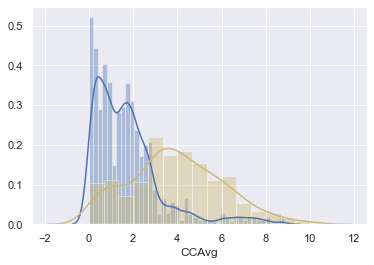

In [225]:
sns.distplot(df[df["Personal Loan"] == 0]['CCAvg'], color = 'b');
sns.distplot(df[df["Personal Loan"] == 1]['CCAvg'], color = 'y');

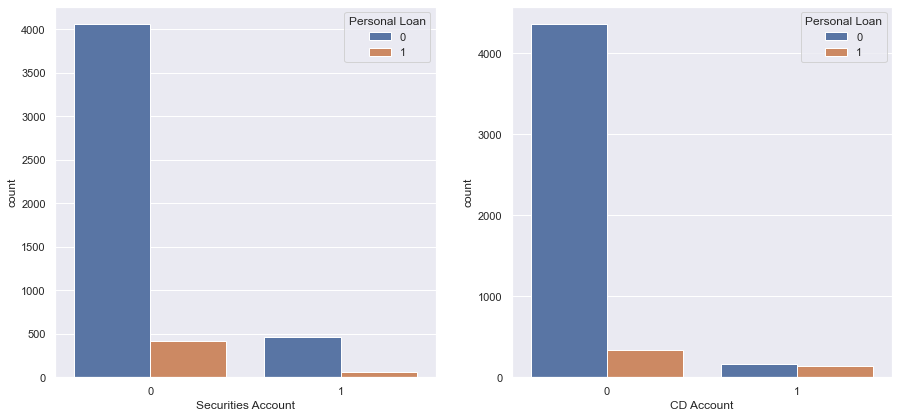

In [230]:
plt.figure(figsize=(15,15))

plt.subplot(2,2,1)
sns.countplot(x="Securities Account", data=df ,hue="Personal Loan");

plt.subplot(2,2,2)
sns.countplot(x='CD Account' ,data=df ,hue='Personal Loan');

Observations: 
- No customer with income < 50,000 opted for the personal loan where as half of the cutomers with income within the range of 150 to 200 thousand dollars purchased personal loan...! Customers within range of (100 to 150) and (200 to 250) thousand dollars showed a conversion rate of about 28.5% and 18.75%, respectively.
- Customers having house Mortgage value in the ranges (300 to 400), (400 to 500) and (500 to 600) show good tendency to buy the personal loans.
- Customer between Age 20 to 30 who took Personal Loan are highest among other age group. 10.5% of the total customers in this group bought personal loan from the bank, 
- One can see that, CCAvg shows good correlation with target attribute. Customers with more average spending on credit cards per month also show more tendancy to buy the personal loans. Customers with avg. credit card spending in the range of 4 to 6 thousand dollars show around 47% conversion rate.
- Majority of the customers DO Not have Securities Account and a small percentage of these do have Personal Loan. Whereas very small proportion of customers having Securities Account do have Personal Loan. Similar observations for CD Account customers. 


# 4) Split the data into training and test set in the ratio of 70:30 respectively

In [9]:
#Separating Target and independent attributes
# ID column not required
# Similarly, Age and Experience are highly correlated and hence one of them may be dropped. 
#Hence dropping 'Experience' attribute data for now keeping it as it is 

X = X.drop("Personal Loan", axis=1)
y = df["Personal Loan"]


from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.3,random_state=1)


In [7]:
# Checkign CM for LR by dropping Experience and Changing random_state to 100
X = df.drop("Experience", axis=1)
#y = df["Personal Loan"]


from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.3,random_state=100)
y.head(10)

0    0
1    0
2    0
3    0
4    0
5    0
6    0
7    0
8    0
9    1
Name: Personal Loan, dtype: int64

In [10]:
X.head()

,ID,Age,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Securities Account,CD Account,Online,CreditCard
0,1,25,49,91107,4,1.6,1,0,1,0,0,0
1,2,45,34,90089,3,1.5,1,0,1,0,0,0
2,3,39,11,94720,1,1.0,1,0,0,0,0,0
3,4,35,100,94112,1,2.7,2,0,0,0,0,0
4,5,35,45,91330,4,1.0,2,0,0,0,0,1


# Checking split of the data

In [371]:
print("{0:0.2f}% data is in training set".format((len(X_train)/len(df.index)) * 100))
print("{0:0.2f}% data is in test set".format((len(X_test)/len(df.index)) * 100))

70.00% data is in training set
30.00% data is in test set


# 5) Use different classification models (Logistic, K-NN and Naïve Bayes) to predict the likelihood of a liability customer buying personal loans

> # Logistic Regression Model

In [11]:
from sklearn.linear_model import LogisticRegression
from sklearn import metrics

In [12]:
LR_model=LogisticRegression(solver='liblinear')
LR_model.fit(X_train, y_train)
LR_Predict = LR_model.predict(X_test)

In [13]:
# LR Model Score
LR_score = LR_model.score(X_test, y_test)
LR_score_t = LR_model.score(X_train, y_train)
#LR Model Score
print("LR Model Score with test data: {0:.4f}".format(LR_score))
print("LR Model Score with training data: {0:.4f}".format(LR_score_t))

LR Model Score with test data: 0.9080
LR Model Score with training data: 0.9091


In [14]:
# Confusion Matrics
print("Cunfusion Matrics for LR Model\n")
cm_LR=metrics.confusion_matrix(y_test, LR_Predict,labels=[1,0])
print(cm_LR)

Cunfusion Matrics for LR Model

[[  43  106]
 [  32 1319]]


> # KNN Model

In [15]:
from sklearn.neighbors import KNeighborsClassifier
#KN_model = KNeighborsClassifier(n_neighbors=5, weights='distance')
KN_model = KNeighborsClassifier()
KN_model.fit(X_train, y_train) 
KN_Predict=KN_model.predict(X_test)


In [16]:
#KNN Model Score
KN_score = KN_model.score(X_test, y_test)
print("KNN Model Score with test data: {0:.4f}".format(KN_score))


KN_score_t = KN_model.score(X_train, y_train)
print("KNN Model Score with training data: {0:.4f}".format(KN_score_t))

print("Best Score when k=15 or more")

KNN Model Score with test data: 0.9020
KNN Model Score with training data: 0.9117
Best Score when k=15 or more


In [17]:
# Cunfusion Matrics
print("Cunfusion Matrics for KNN Model\n")
cm_KN=metrics.confusion_matrix(y_test, KN_Predict, labels=[1,0])
print(cm_KN)

Cunfusion Matrics for KNN Model

[[   4  145]
 [   2 1349]]


> # Naive Bayes

In [18]:
from sklearn.naive_bayes import GaussianNB
NB_Model =GaussianNB() 
NB_Model.fit(X_train, y_train)
NB_Predict=NB_Model.predict(X_test)

#Model Score with Test Data
print("Model Score with test data: {0:.4f}".format(metrics.accuracy_score(y_test, NB_Predict)))

#Model Score with Training Data 
NB_Predict_train=NB_Model.predict(X_train)
print("Model Accuracy with train data: {0:.4f}".format(metrics.accuracy_score(y_train, NB_Predict_train)))
print()

Model Score with test data: 0.8840
Model Accuracy with train data: 0.8954



In [19]:
#Confusion Matrics for NB Model 
from sklearn import metrics
cm_NB=metrics.confusion_matrix(y_test, NB_Predict, labels=[1, 0])
#cm=metrics.confusion_matrix(y_test, LR_Predict, labels=[1, 0])
print(cm_NB)

[[  85   64]
 [ 110 1241]]


> # Decision Tree

In [22]:
from sklearn.tree import DecisionTreeClassifier
from IPython.display import Image
tr = DecisionTreeClassifier(criterion='gini', random_state=1)
tr.fit(X_train, y_train)

print(tr.score(X_train, y_train))
print(tr.score(X_test, y_test))

DT_Predict=tr.predict(X_test)

cm_tr=metrics.confusion_matrix(y_test, DT_Predict, labels=[1, 0])

1.0
0.9786666666666667


> # SVM 

In [49]:
from sklearn import svm
# Build Model
svm = svm.SVC(gamma=0.025, C=3)  
svm.fit(X_train , y_train)
print(svm.score(X_train, y_train))
print(svm.score(X_test, y_test))
SVM_Predict=svm.predict(X_test)
cm_svm=metrics.confusion_matrix(y_test, SVM_Predict, labels=[1, 0])

1.0
0.9006666666666666


# 6) Print the confusion matrix for all of the above models

Text(0.5, 314.68371323529414, 'Actual Label')

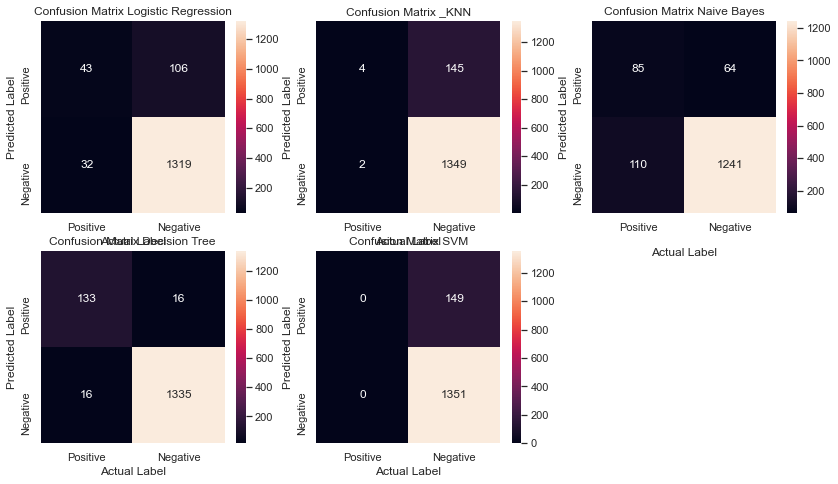

In [50]:
from sklearn import metrics
# Confusion Matrics
# Confusion Matrics with Logistic Regression Model 
plt.figure(figsize = (14,12))
plt.subplot(3,3,1)
#print("Cunfusion Matrics for LR Model\n")
class_label = ["Positive", "Negative"]
df_cm = pd.DataFrame(cm_LR, index = class_label, columns = class_label)
sns.heatmap(df_cm, fmt='d',annot=True);
plt.title("Confusion Matrix Logistic Regression")
plt.ylabel("Predicted Label")
plt.xlabel("Actual Label")

# Confusion Matrics with KNN Regression Model 
plt.subplot(3,3,2)
class_label = ["Positive", "Negative"]
df_cm = pd.DataFrame(cm_KN, index = class_label, columns = class_label)
sns.heatmap(df_cm, fmt='d',annot=True);
plt.title("Confusion Matrix _KNN")
plt.ylabel("Predicted Label")
plt.xlabel("Actual Label")

# Confusion Matrics with Naive Bayes Regression Model 
plt.subplot(3,3,3)
#print("Cunfusion Matrics f(or NB Mordel\n")
class_label = ["Positive", "Negative"]
df_cm = pd.DataFrame(cm_NB, index = class_label, columns = class_label)
sns.heatmap(df_cm, fmt='d',annot=True);
plt.title("Confusion Matrix Naive Bayes")
plt.ylabel("Predicted Label")
plt.xlabel("\nActual Label")

# Confusion Matrics with Decision Tree
plt.subplot(3,3,4)
#print("Cunfusion Matrics for DT Mordel\n")
class_label = ["Positive", "Negative"]
dt_cm = pd.DataFrame(cm_tr, index = class_label, columns = class_label)
sns.heatmap(dt_cm, fmt='d',annot=True);
plt.title("Confusion Matrix Decision Tree")
plt.ylabel("Predicted Label")
plt.xlabel("Actual Label")


# Confusion Matrics with DeciSVM Model
plt.subplot(3,3,5)
#print("Cunfusion Matrics for SVM Mordel\n")
class_label = ["Positive", "Negative"]
sv_cm = pd.DataFrame(cm_svm, index = class_label, columns = class_label)
sns.heatmap(sv_cm, fmt='d',annot=True);
plt.title("\nConfusion Matrix SVM")
plt.ylabel("Predicted Label")
plt.xlabel("Actual Label")

# Classification Report analysis

In [42]:
print("Classification Report - LR")
print(metrics.classification_report(y_test,LR_Predict,labels=(1,0)))

print("Classification Report - KNN")
print(metrics.classification_report(y_test,KN_Predict,labels=(1,0)))


print("Classification Report - NB")
print(metrics.classification_report(y_test,NB_Predict,labels=(1,0))) 

print("Classification Report - DT")
print(metrics.classification_report(y_test,DT_Predict,labels=(1,0))) 

print("Classification Report - SVM")
print(metrics.classification_report(y_test,SVM_Predict,labels=(1,0))) 




Classification Report - LR
              precision    recall  f1-score   support

           1       0.57      0.29      0.38       149
           0       0.93      0.98      0.95      1351

    accuracy                           0.91      1500
   macro avg       0.75      0.63      0.67      1500
weighted avg       0.89      0.91      0.89      1500

Classification Report - KNN
              precision    recall  f1-score   support

           1       0.67      0.03      0.05       149
           0       0.90      1.00      0.95      1351

    accuracy                           0.90      1500
   macro avg       0.78      0.51      0.50      1500
weighted avg       0.88      0.90      0.86      1500

Classification Report - NB
              precision    recall  f1-score   support

           1       0.44      0.57      0.49       149
           0       0.95      0.92      0.93      1351

    accuracy                           0.88      1500
   macro avg       0.69      0.74      0.71   

/opt/anaconda3/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [44]:
#Accuracy Score 

ac_LR= accuracy_score(y_test, LR_Predict)
#print(ac_LR)
print("The accuracy of the LR model is {0:.2f} %".format(ac_LR*100))


ac_KN= accuracy_score(y_test, KN_Predict)
print("The accuracy of the KNN model is {0:.2f} %".format(ac_KN*100))
#print(ac_KN)
#print('\n')

ac_NB= accuracy_score(y_test, NB_Predict)
print("The accuracy of the NB model is {0:.2f} %".format(ac_NB*100))
#print(ac_NB)

ac_DT= accuracy_score(y_test, DT_Predict)
print("The accuracy of the DT model is {0:.2f} %".format(ac_DT*100))
#print(ac_NB)

ac_SVM= accuracy_score(y_test, SVM_Predict)
print("The accuracy of the DT model is {0:.2f} %".format(ac_SVM*100))
#print(ac_NB)




The accuracy of the LR model is 90.80 %
The accuracy of the KNN model is 90.20 %
The accuracy of the NB model is 88.40 %
The accuracy of the DT model is 97.87 %
The accuracy of the DT model is 90.07 %


# 7) Give your reasoning on which is the best model in this case and why it performs better?

# Observations:

## LR 
- Accuracy is good 90.8%, 

- f1-score is(0.38): f1 is better then the KNN model Precision and recall values are not upto the mark especially recall value is low (.29) for class 1. 
- 29% Recall value essentially means, out of all the customers who would actually buy the loan, only 29% were correctly predicted to be positive (would buy the personal loan) thus bank is missing on 72% of potential customers.

- 57% of precision value means out of all potential Personal Loan buyers only 58% were predicted correctly .

## KNN 

- Accuracy is good ~90.7% similar to LR model 

- f1-score is very low (0.05): Precision value is very low ~3% which means out of total customer who bought Personal Loan only 3% were identified correctly, the model missed 97% of the customers. The Bank loosed potential Personal Loan Buyer and hence this the worst model among three models.

- 66% Recall value essentially means, out of all the customers who would actually buy the loan, 66% were correctly predicted to be positive (would buy the personal loan).



## NB

- Accuracy is good 88.27% 

- f1-score is better then the both LR and KNN models (0.49): Precision value is 57% which means out of total customer who bought Personla Loan 57% were identified correctly, the model missed 43% of the customers.

- 43% Recall value essentially means, out of all the customers who would actually buy the loan, 43% were correctly predicted to be positive (would buy the personal loan).


***
# So finally the preferred model is Naive Bayes ...!

## Reason: 

>Considering the objective of this project, Which is to predict the possibility of a liability customer buying Personal Loan it makes perfect sense to consider high Recall percentage at the same time maintainig decent Precison score. Hence, among the three model Naive Bayes seems to be THE BETTER model with

- 89% Accuracy
- 0.49 f1 score (Which is better then LR(0.38) and KNN (0.05) 
- 88% Model score

The reason it performs better because Naive Bayes classifier assumes the independence of the X variables (i.e., independent variables) and for this particular problem this is approximately true which is clear from the correlation heatmap as well. 

***
***

# Trying the Model performance with Scalled data

In [474]:
#using StandarScaler
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train_s = scaler.fit_transform(X_train)
X_test_s = scaler.fit_transform(X_test)

In [475]:
#LR Model 
LR_model_s=LogisticRegression(solver='liblinear')
LR_model_s.fit(X_train_s, y_train)
LR_Predict_s = LR_model.predict(X_test_s)

LR_score_s = LR_model.score(X_test_s, y_test)
LR_score_ts = LR_model.score(X_train_s, y_train)

#LR Model Score
print("LR Model Score with Scalled test data: {0:.4f}".format(LR_score_s))

#KN_score_t = KN_model.score(X_train, y_train)
print("LR Model Score with Scalled training data: {0:.4f}".format(LR_score_ts))

LR Model Score with Scalled test data: 0.9480
LR Model Score with Scalled training data: 0.9529


In [443]:
# Confusion Matrics
print("Cunfusion Matrics for LR Model with Scalled Data \n")
cm_LR_s=metrics.confusion_matrix(y_test, LR_Predict_s,labels=[1,0])
print(cm_LR_s)

Cunfusion Matrics for LR Model with Scalled Data 

[[  88   61]
 [  17 1334]]


In [476]:
#KNN Model
KN_model_s = KNeighborsClassifier(n_neighbors=3)
KN_model_s.fit(X_train_s, y_train) 
KN_Predict_s=KN_model_s.predict(X_test_s)

#KNN Model Score with Test Data
KN_score_s = KN_model_s.score(X_test_s, y_test)
print("KNN Model Score with test data: {0:.4f}".format(KN_score_s))


# Cunfusion Matrics
print("Cunfusion Matrics for KNN Model\n")
cm_KN_s=metrics.confusion_matrix(y_test, KN_Predict_s, labels=[1,0])
print(cm_KN_s)

KNN Model Score with test data: 0.9453
Cunfusion Matrics for KNN Model

[[  77   72]
 [  10 1341]]


In [477]:
#Naive Bayes Model
from sklearn.naive_bayes import GaussianNB
NB_Model_s =GaussianNB() 
NB_Model_s.fit(X_train_s, y_train)
NB_Predict_s=NB_Model_s.predict(X_test_s)

#KNN Model Score with Test Data
NB_score_s = NB_Model_s.score(X_test_s, y_test)
print("NB Model Score with test data: {0:.4f}".format(NB_score_s))

#Confusion Matrics for NB Model 
from sklearn import metrics
cm_NB_s=metrics.confusion_matrix(y_test, NB_Predict_s, labels=[1, 0])
#cm=metrics.confusion_matrix(y_test, LR_Predict, labels=[1, 0])
print(cm_NB_s)

NB Model Score with test data: 0.8693
[[  78   71]
 [ 125 1226]]


# Classification Report with Scalled Data 

In [470]:
print("Classification Report - LR with Scalled Data ")
print(metrics.classification_report(y_test,LR_Predict_s,labels=(1,0)))

print("Classification Report - KNN with Scalled Data")
print(metrics.classification_report(y_test,KN_Predict_s,labels=(1,0)))


print("Classification Report - NB with Scalled Data ")
print(metrics.classification_report(y_test,NB_Predict_s,labels=(1,0))) 

Classification Report - LR with Scalled Data 
              precision    recall  f1-score   support

           1       0.84      0.59      0.69       149
           0       0.96      0.99      0.97      1351

    accuracy                           0.95      1500
   macro avg       0.90      0.79      0.83      1500
weighted avg       0.94      0.95      0.94      1500

Classification Report - KNN with Scalled Data
              precision    recall  f1-score   support

           1       0.89      0.52      0.65       149
           0       0.95      0.99      0.97      1351

    accuracy                           0.95      1500
   macro avg       0.92      0.75      0.81      1500
weighted avg       0.94      0.95      0.94      1500

Classification Report - NB with Scalled Data 
              precision    recall  f1-score   support

           1       0.38      0.52      0.44       149
           0       0.95      0.91      0.93      1351

    accuracy                           0.87 

# Confusion Matrix with Scalled Data 

Text(0.5, 84.4531250000001, 'Actual Label')

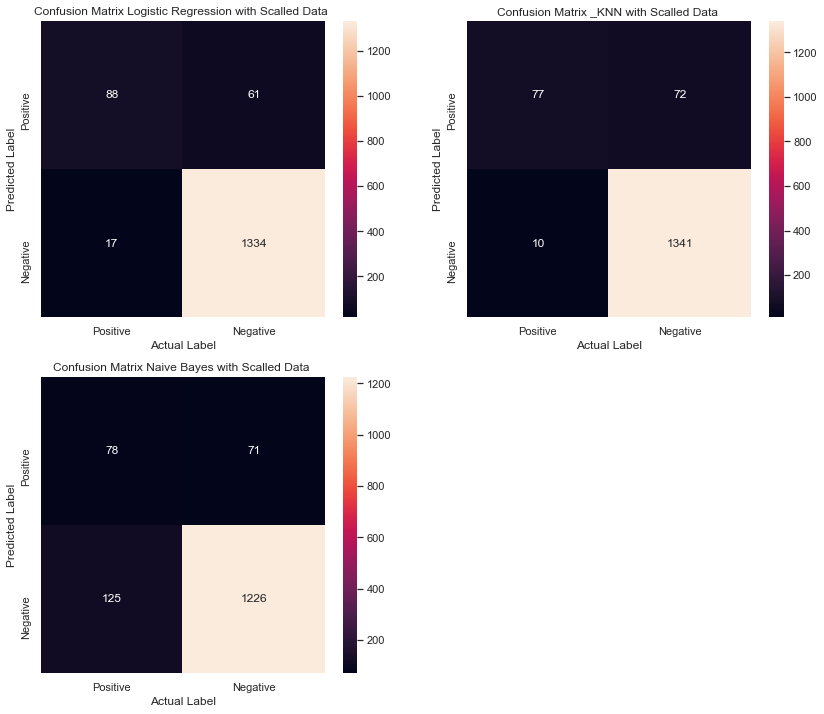

In [471]:
from sklearn import metrics
# Confusion Matrics
# Confusion Matrics with Logistic Regression Model 
plt.figure(figsize = (14,12))
plt.subplot(2,2,1)
#print("Cunfusion Matrics for LR Model\n")
class_label = ["Positive", "Negative"]
df_cm_lr = pd.DataFrame(cm_LR_s, index = class_label, columns = class_label)
sns.heatmap(df_cm_lr, fmt='d',annot=True);
plt.title("Confusion Matrix Logistic Regression with Scalled Data ")
plt.ylabel("Predicted Label")
plt.xlabel("Actual Label")

# Confusion Matrics with KNN Regression Model 
plt.subplot(2,2,2)
class_label = ["Positive", "Negative"]
df_cm_kn= pd.DataFrame(cm_KN_s, index = class_label, columns = class_label)
sns.heatmap(df_cm_kn, fmt='d',annot=True);
plt.title("Confusion Matrix _KNN with Scalled Data ")
plt.ylabel("Predicted Label")
plt.xlabel("Actual Label")

# Confusion Matrics with Naive Bayes Regression Model 
plt.subplot(2,2,3)
#print("Cunfusion Matrics for NB Model\n")
class_label = ["Positive", "Negative"]
df_cm_nb = pd.DataFrame(cm_NB_s, index = class_label, columns = class_label)
sns.heatmap(df_cm_nb, fmt='d',annot=True);
plt.title("Confusion Matrix Naive Bayes with Scalled Data ")
plt.ylabel("Predicted Label")
plt.xlabel("Actual Label")



## Observation of the best model performance with Scalled Data 

-  Logistic Regression ! 
> - Logistic Regression Model Performed extremely well when compated with other two models 
> > - Accuracy improved from 91% to 95%
> > - f1 value improved from 0.38 to 0.69
> > - Drastive increase in Precision from 28% to 84% 
> > - Error Rate decreased from 9% to 3 % 

>> The improved performance is attributed to the fact that Logistic regression is less inclined to over-fitting. 
>> It shows good accuracy for many simple data sets and it performs well when the dataset is linearly separable.